<a href="https://colab.research.google.com/github/RRustom/architecture-data/blob/main/sd_architecture_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upload the diffusers to HuggingFace

In [ ]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 163 kB 15.0 MB/s 


In [ ]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

In [ ]:
# %Mount Google Drive
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# from huggingface_hub import HfApi

# api = HfApi()

# api.upload_folder(
#     folder_path="/gdrive/MyDrive/stable-architecture/stable-diffusion/stable-diffusion/diffusers/epoch_157_weights",
#     #path_in_repo="my-dataset/train",
#     repo_id="rrustom/stable-architecture-diffusers",
#     repo_type="model",
#     # ignore_patterns="**/logs/*.txt",
# )

'https://huggingface.co/rrustom/stable-architecture-diffusers/tree/main/'

In [ ]:
# api.upload_folder(
#     folder_path="/gdrive/MyDrive/stable-architecture/stable-diffusion/stable-diffusion/diffusers/epoch_157_ema_weights",
#     #path_in_repo="my-dataset/train",
#     repo_id="rrustom/stable-architecture-diffusers-ema",
#     repo_type="model",
#     # ignore_patterns="**/logs/*.txt",
# )

'https://huggingface.co/rrustom/stable-architecture-diffusers-ema/tree/main/'

#Test the diffusers

In [ ]:
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install -qq "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 153 kB 13.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 15.2 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 6.6 MB 68.8 MB/s 
     |████████████████████████████████| 1.6 MB 15.0 MB/s 


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from torch import autocast

pipe = StableDiffusionPipeline.from_pretrained("rrustom/stable-architecture-diffusers", torch_dtype=torch.float16)  
pipe = pipe.to("cuda")

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/179 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.57k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/234 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/697 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

  0%|          | 0/51 [00:00<?, ?it/s]

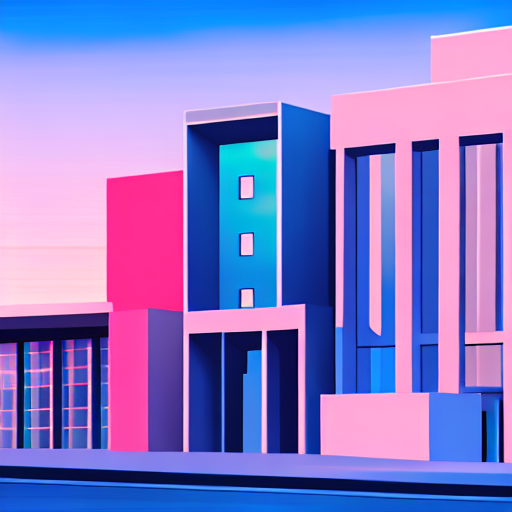

In [ ]:
prompt = "a pastel architectural visualization of a building in a city"
scale = 10

# Sometimes the nsfw checker is confused by the Pokémon images, you can disable
# it at your own risk here
disable_safety = False

if disable_safety:
  def null_safety(images, **kwargs):
      return images, False
  pipe.safety_checker = null_safety

with autocast("cuda"):
  images = pipe([prompt], guidance_scale=scale).images

for idx, im in enumerate(images):
  #im.save(f"{idx:06}.png")
  display(im)

#Img2Img Pipeline

In [ ]:
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline

##Load Pipeline

In [ ]:
device = "cuda"
model_path = "rrustom/stable-architecture-diffusers"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    #revision="fp16", 
    torch_dtype=torch.float16,
    # use_auth_token=True
)
pipe = pipe.to(device)

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

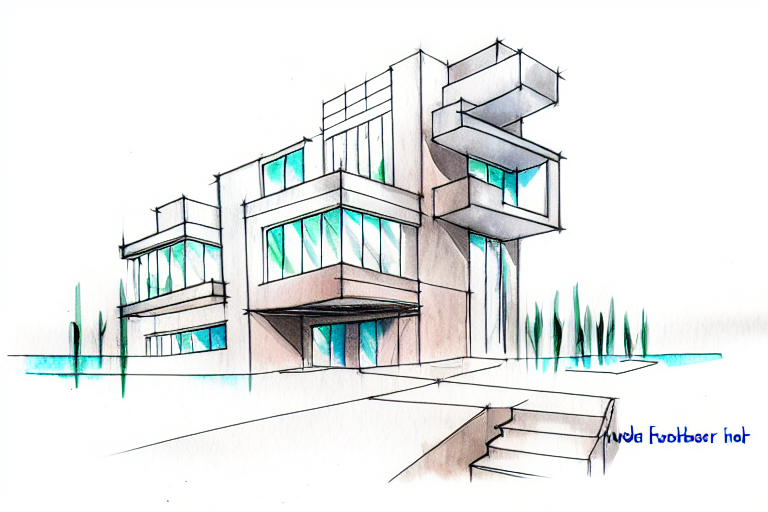

In [ ]:
import requests
from io import BytesIO
from PIL import Image

#url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

#response = requests.get(url)
init_img = Image.open('/content/data/modern_sketch_2_055_a colorful water color architectural drawing of a 3 story modern futuristic home.png').convert("RGB")
init_img = init_img.resize((768, 512))
init_img

Define the prompt and run the pipeline

In [ ]:
prompt = "a water color architectural drawing of a 3 story modern futuristic home"

Here, `strength` is a value between 0.0 and 1.0, that controls the amount of noise that is added to the input image. Values that approach 1.0 allow for lots of variations but will also produce images that are not semantically consistent with the input.

  0%|          | 0/23 [00:00<?, ?it/s]

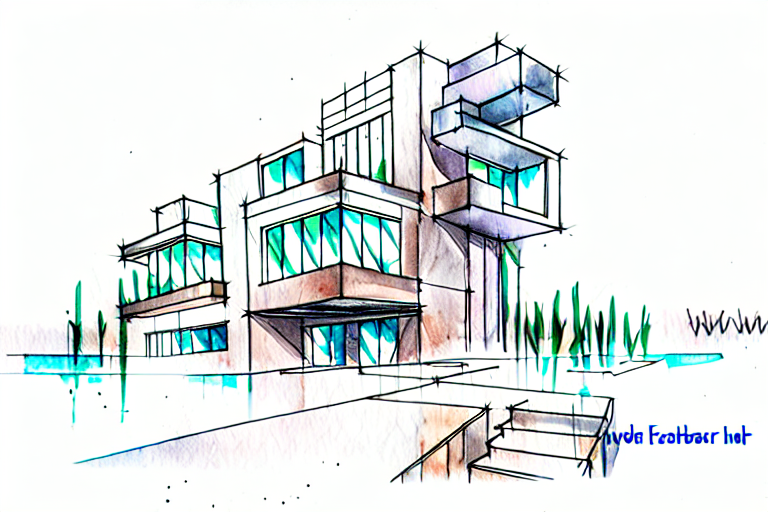

In [ ]:
generator = torch.Generator(device=device).manual_seed(1024)
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.45, guidance_scale=11, generator=generator).images[0]

image

In [ ]:
image.save(f"/content/data/results/modern_watercolor_{prompt}_1.png")

In [ ]:
image.save("/content/data/results/floorplan_055_a colorful watercolor architectural drawing of a floorplan of an apartment with furniture.png")

In [ ]:
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.5, guidance_scale=7.5, generator=generator).images[0]

Now using [LMSDiscreteScheduler](https://huggingface.co/docs/diffusers/api/schedulers#diffusers.LMSDiscreteScheduler)

In [ ]:
prompt = "a playful 3D isometric rendering of a modern futuristic 3 story house with a garden and trees ultra-realistic"

In [ ]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")
pipe.scheduler = lms

In [ ]:
generator = torch.Generator(device=device).manual_seed(1024)
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.6, guidance_scale=11, generator=generator).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

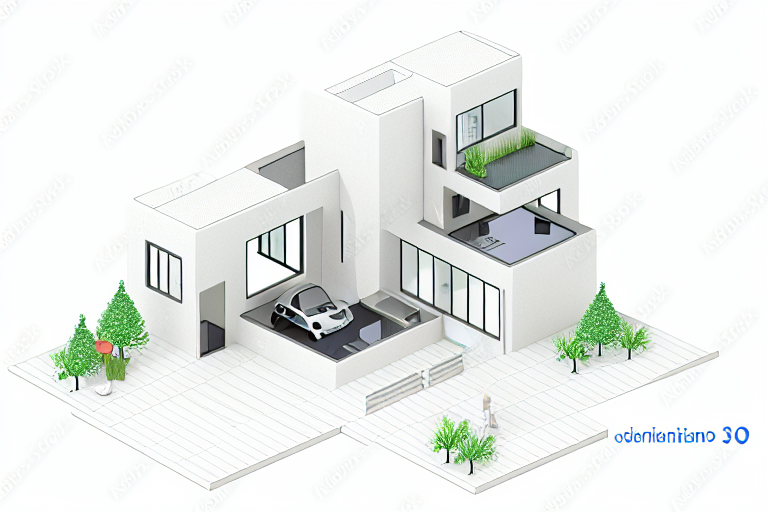

In [ ]:
image

In [ ]:
image.save(f"/content/data/results/modern_sketch_2_06_11_{prompt}.png")

#Testing the Inference API

In [ ]:
from getpass import getpass
token = getpass('Enter the secret value: ')

from huggingface_hub.inference_api import InferenceApi
inference = InferenceApi(repo_id="rrustom/stable-architecture-diffusers", token=token)

Enter the secret value: ··········
